In [2]:
from functions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
from datetime import datetime

In [3]:
def Reorganize(myFitsInOrder,viFitsDates):
    #this function takes Dates from myFitsInOrder and viFitsDates, and returns the index of myFits that matches
    #the date in viFits
    indices=np.empty(0)
    myFitsDates=(myFitsInOrder[0].astype(int)//100).astype(str)
    for k in viFitsDates:
        for i,j in enumerate(myFitsDates):
            if j==k:
                indices=np.append(indices,i)
                #print(i)
                break
    return(indices)

def MakeNewForComparison(indices,myFitsInOrder):
    myFitsInOrder=np.transpose(myFitsInOrder)
    #this function takes the indices from Reorganize and returns array of myFits to compare to viFits
    refined=np.transpose(myFitsInOrder[indices.astype(int)])
    return refined

In [4]:
#Function to match indices with same dates
def FindIndices(array, target):
    indices = []
    for i in range(len(array)):
        if target in array[i]:
            indices.append(i)
    return indices

#Function to organize myFits to align chronologically with the fits from the vi
def ReorderArray(array, indices):
    return [array[i] for i in indices]

I start by looking at the fits I produced versus the fits produced from the GEn_NMR.vi. I look at the ratios of my fits to the vi's fits to look for consistency.

In [5]:
#My fits 
myFits=np.transpose(np.load('NMRDataFits/FitsInRange.npy'))

#Organize chronologically
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
myFitsInOrder = np.transpose(np.take(myFits, index_array, axis=0))


#Flip back
myFits=np.transpose(myFits)
#Hunter kinematic 1 fits from vi
viFitsHKin1=np.transpose(np.loadtxt('VIData/data.txt'))

#Hunter kinematic 2 fits from vi
viFitsHKin2=np.transpose(np.loadtxt('VIData/hunter.txt'))

#Windmill fits from vi
viFitsW=np.transpose(np.loadtxt('VIData/windmill.txt'))



In [6]:
#myFitsInOrder[0]

In [7]:
#Adding first two digits of year to easily compare the different formats. Nothing special here - just reorganizing
#the data

datesHKin1=viFitsHKin1[0].astype(int).astype(str)
for i,j in enumerate(datesHKin1):
    j= '20'+j
    datesHKin1[i]=j

datesHKin2=viFitsHKin2[0].astype(int).astype(str)
for i,j in enumerate(datesHKin2):
    j= '20'+j
    datesHKin2[i]=j
    
datesW=viFitsW[0].astype(int).astype(str)
for i,j in enumerate(datesW):
    j= '20'+j
    datesW[i]=j
    


In [8]:
newDatesHKin2=datesHKin2[100:131]
newDatesHKin1=datesHKin1[1:61]
newDatesW=datesW[90:180]

In [9]:
newDatesHKin1[0]

'202210241943'

In [10]:
newDatesHKin1[-1:]

array(['202210311550'], dtype='<U21')

In [11]:
len(newDatesW)

90

In [12]:
myFitsDates=(myFitsInOrder[0].astype(int)//100).astype(str)
len(myFitsDates)

1140

In [13]:
indicesHK2=Reorganize(myFitsInOrder,newDatesHKin2)
myFitsReorganizedHK2=MakeNewForComparison(indicesHK2,myFitsInOrder)

indicesW=Reorganize(myFitsInOrder,newDatesW)
myFitsReorganizedW=MakeNewForComparison(indicesW,myFitsInOrder)

indicesHK1=Reorganize(myFitsInOrder,newDatesHKin1)
myFitsReorganizedHK1=MakeNewForComparison(indicesHK1,myFitsInOrder)

In [14]:
viFitsHKin2T=np.transpose(viFitsHKin2)
viFitsReorganizedHK2=np.transpose(viFitsHKin2T[100:131])

viFitsHKin1T=np.transpose(viFitsHKin1)
viFitsReorganizedHK1=np.transpose(viFitsHKin1T[1:61])

viFitsWT=np.transpose(viFitsW)
viFitsReorganizedW=np.transpose(viFitsWT[90:180])
#viFitsReorganizedHK2[0].astype(int).astype(str)

In [15]:
#(myFitsReorganizedHK2[0].astype(int)//100).astype(str)

In [16]:
mypcHK2=myFitsReorganizedHK2[1]
vipcHK2=(viFitsReorganizedHK2[1]+viFitsReorganizedHK2[2])/2

myusHK2=myFitsReorganizedHK2[2]
viusHK2=(viFitsReorganizedHK2[5]+viFitsReorganizedHK2[6])/2

mydsHK2=myFitsReorganizedHK2[3]
vidsHK2=(viFitsReorganizedHK2[3]+viFitsReorganizedHK2[4])/2

mypcHK1=(myFitsReorganizedHK1[4]+myFitsReorganizedHK1[5])/2
vipcHK1=(viFitsReorganizedHK1[1]+viFitsReorganizedHK1[2])/2

mydsHK1=myFitsReorganizedHK1[3]
vidsHK1=(viFitsReorganizedHK1[3]+viFitsReorganizedHK1[4])/2

mypcW=myFitsReorganizedW[1]
vipcW=(viFitsReorganizedW[1]+viFitsReorganizedW[2])/2

myusW=myFitsReorganizedW[2]
viusW=(viFitsReorganizedW[5]+viFitsReorganizedW[6])/2

mydsW=myFitsReorganizedW[3]
vidsW=(viFitsReorganizedW[3]+viFitsReorganizedW[4])/2

In [17]:
for i in range(0,len(myFitsReorganizedW[0])):
    if (myFitsReorganizedW.astype(int)//100).astype(str)[0][i] != '20'+viFitsReorganizedW[0][i].astype(int).astype(str):
        print(i)

# Hunter Kin3

Here, I look at the ratios of my fits to the vi fits for 31 data points taken while Hunter was installed in Kinematic 3

In [18]:
ratioPCHK2=mypcHK2/vipcHK2

ratioUSHK2=myusHK2/viusHK2

ratioDSHK2=mydsHK2/vidsHK2


In [24]:
len(ratioDSHK2)

31

In [19]:
print('PC STD, Mean : ',np.round(np.std(ratioPCHK2),5),',',np.round(np.mean(ratioPCHK2),5))
print('TCUS STD, Mean : ',np.round(np.std(ratioUSHK2),5),',',np.round(np.mean(ratioUSHK2),5))
print('TCDS STD, Mean : ',np.round(np.std(ratioDSHK2),5),',',np.round(np.mean(ratioDSHK2),5))

PC STD, Mean :  0.00077 , 0.89935
TCUS STD, Mean :  0.00866 , 0.90966
TCDS STD, Mean :  0.00324 , 0.90071


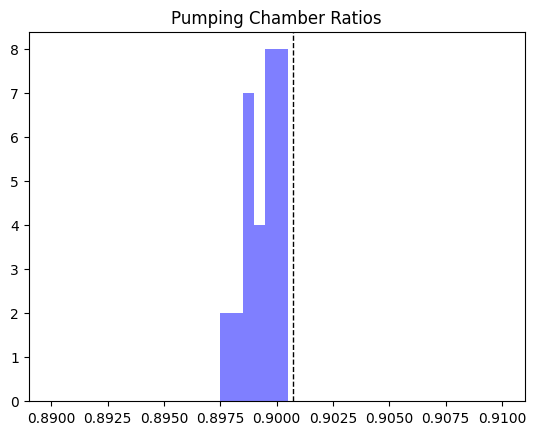

In [20]:
bins,dat,bar = plt.hist(ratioPCHK2,40,range=(.89,.91),alpha=.5,color='blue')
plt.title("Pumping Chamber Ratios")
plt.axvline(np.round(np.mean(ratioDSHK2),5), color='black', linestyle='dashed', linewidth=1)

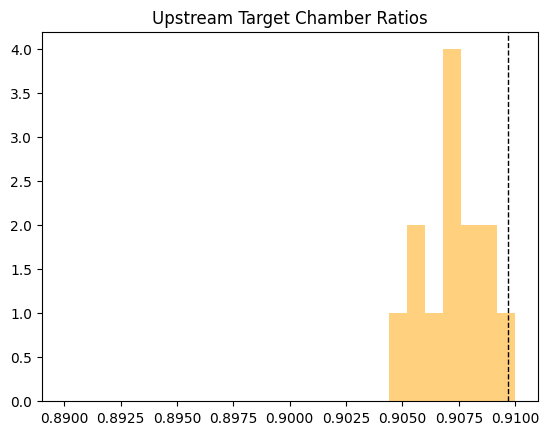

In [21]:
bins,dat,bar = plt.hist(ratioUSHK2,25,range=(.89,.91),alpha=.5,color='orange')
plt.title("Upstream Target Chamber Ratios")
plt.axvline(np.round(np.mean(ratioUSHK2),5), color='black', linestyle='dashed', linewidth=1)

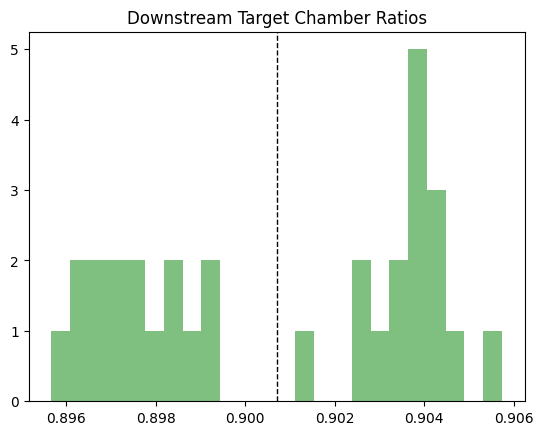

In [23]:
bins,dat,bar = plt.hist(ratioDSHK2,24,alpha=.5,color='green')
plt.title('Downstream Target Chamber Ratios')
plt.axvline(np.round(np.mean(ratioDSHK2),5), color='black', linestyle='dashed', linewidth=1)

# Hunter Kin 2

In [26]:
ratioPCHK1=mypcHK1/vipcHK1

ratioDSHK1=mydsHK1/vidsHK1

In [27]:
print('PC STD, Mean : ',np.round(np.std(ratioPCHK1),5),',',np.round(np.mean(ratioPCHK1),5))
print('TCDS STD, Mean : ',np.round(np.std(ratioDSHK1),5),',',np.round(np.mean(ratioDSHK1),5))

PC STD, Mean :  0.14898 , 0.91464
TCDS STD, Mean :  0.12607 , 0.85692


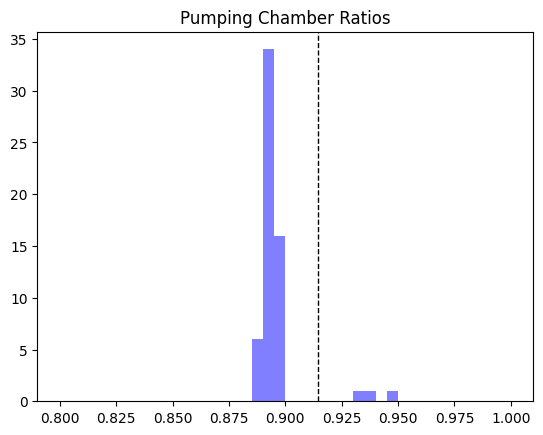

In [28]:
bins,dat,bar = plt.hist(ratioPCHK1,40,range=(.80,1),alpha=.5,color='blue')
plt.title("Pumping Chamber Ratios")
plt.axvline(np.round(np.mean(ratioPCHK1),5), color='black', linestyle='dashed', linewidth=1)

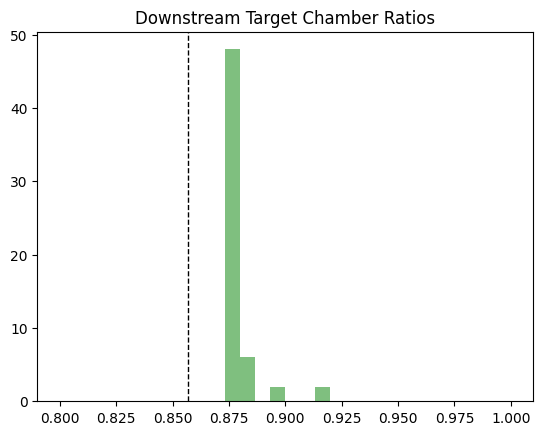

In [29]:
bins,dat,bar = plt.hist(ratioDSHK1,30,range=(.80,1),alpha=.5,color='green')
plt.title('Downstream Target Chamber Ratios')
plt.axvline(np.round(np.mean(ratioDSHK1),5), color='black', linestyle='dashed', linewidth=1)

# Windmill Kin 3

Here, I do the same but with 90 data points

In [30]:
ratioPCW=mypcW/vipcW

ratioUSW=myusW/viusW

ratioDSW=mydsW/vidsW

In [31]:
print('PC STD, Mean : ',np.round(np.std(ratioPCW),5),',',np.round(np.mean(ratioPCW),5))
print('TCUS STD, Mean : ',np.round(np.std(ratioUSW),5),',',np.round(np.mean(ratioUSW),5))
print('TCDS STD, Mean : ',np.round(np.std(ratioDSW),5),',',np.round(np.mean(ratioDSW),5))

PC STD, Mean :  0.02442 , 0.92126
TCUS STD, Mean :  0.02799 , 0.90994
TCDS STD, Mean :  0.02758 , 0.90342


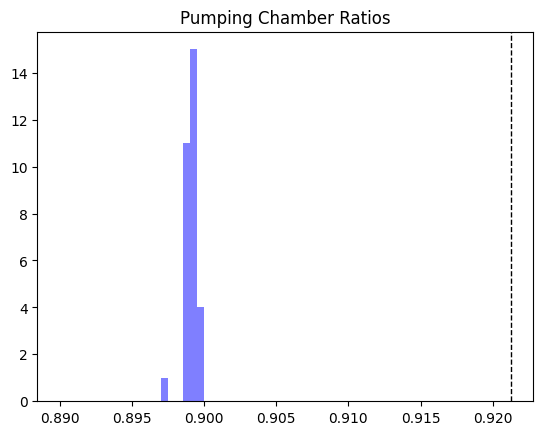

In [32]:
bins,dat,bar = plt.hist(ratioPCW,40,range=(.89,.91),alpha=.5,color='blue')
plt.title("Pumping Chamber Ratios")
plt.axvline(np.round(np.mean(ratioPCW),5), color='black', linestyle='dashed', linewidth=1)

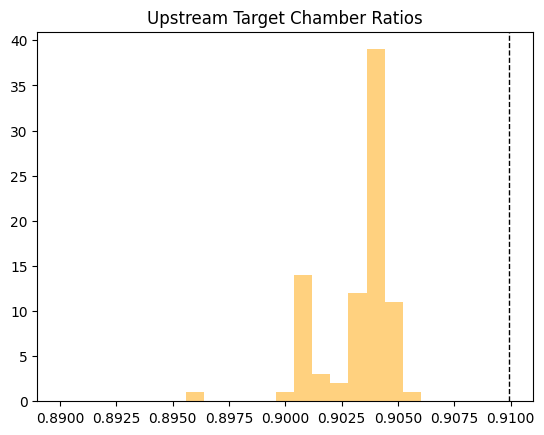

In [33]:
bins,dat,bar = plt.hist(ratioUSW,25,range=(.89,.91),alpha=.5,color='orange')
plt.title("Upstream Target Chamber Ratios")
plt.axvline(np.round(np.mean(ratioUSW),5), color='black', linestyle='dashed', linewidth=1)

Text(0.5, 1.0, 'Downstream Target Chamber Ratios')

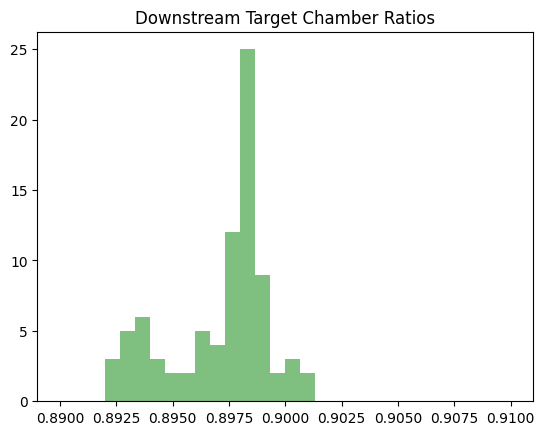

In [34]:
bins,dat,bar = plt.hist(ratioDSW,30,range=(.89,.91),alpha=.5,color='green')
plt.title('Downstream Target Chamber Ratios')
#plt.axvline(np.round(np.mean(ratioDSW),5), color='black', linestyle='dashed', linewidth=1)